# Лабораторная работа №107

# ОПРЕДЕЛЕНИЕ КОЭФФИЦИЕНТА СИЛЫ СУХОГО ТРЕНИЯ

## Обработка результатов

введем параметры брусков

In [1]:
md = 33.67 #гр
mt = 20.79 #гр
g = 9.38 #м/с^2

## Упражнение 1. Определение коэффициента трения из значения максимальной силы трения покоя.

![kartinka](107\1077.png)


$$ \mu = Acp / b $$

где Acp - среднее значение катета 1; 
b - катет 2

НАШИ ДАННЫЕ:

In [2]:
import numpy as np
def read(filename):
    f = open(filename, "r")
    res = np.empty(0)
    for line in f:
        res = np.append(res, float(line))
    f.close()
    return res
b = 0.2 #м
a = read("ex1_a.txt")


Посчитаем Aср по формуле:
$$ Acp  = {\sum_1^n a \over n} $$

где n = 3

In [3]:
def average(arr):
    return(sum(arr)/len(arr))

a1 = average(a[0:2]) 
a2 = average(a[3:5])
a3 = average(a[6:8])
a4 = average(a[9:11])
#средние значения
A = [a1, a2, a3, a4]

Найдем коэфициенты трения по формуле:
$$ \mu = Acp / b $$

In [4]:
u1 = a1/b
u2 = a2/b
u3 = a3/b
u4 = a4/b
u = [u1, u2, u3, u4]

Посчитаем погрешности величин по формулам:
$$\sigma a = \sqrt{{1 \over N(N - 1)}\sum_1^N (a_n - Acp)^2}$$


In [5]:
import math
N = 3 
sigmaa1 = (((a[0]-a1)**2 + (a[1]-a1)**2 + (a[2]-a1)**2) / N*(N-1))**1/2 
sigmaa2 = (((a[3]-a2)**2 + (a[4]-a2)**2 + (a[5]-a2)**2) / N*(N-1))**1/2 
sigmaa3 = (((a[6]-a3)**2 + (a[7]-a3)**2 + (a[8]-a3)**2) / N*(N-1))**1/2 
sigmaa4 = (((a[9]-a4)**2 + (a[10]-a4)**2 + (a[11]-a4)**2) / N*(N-1))**1/2 
sig = [1000*sigmaa1, 1000*sigmaa2, 1000*sigmaa3, 1000*sigmaa4]
Su1 = sigmaa1/b
Su2 = sigmaa2/b
Su3 = sigmaa3/b
Su4 = sigmaa4/b
Su = [1000*Su1, 1000*Su2, 1000*Su3, 1000*Su4]
print(Su)
f1 = u1 * md * g / 1000
f2 = u2 * md * g / 1000
f3 = u3 * mt * g / 1000
f4 = u4 * mt * g / 1000
F = [f1, f2, f3, f4]


[0.004583333333333342, 0.01125000000000002, 0.004583333333333342, 0.010000000000000018]


-----------------------------------------------------------------------------
Найдены силы трения, действующие на бруски по формуле:
$$F = \mu m g $$

Построим график зависимости 
$$\mu(Acp)$$

        A       u       sig        Su         F
0  0.0535  0.2675  0.000917  0.004583  0.084483
1  0.0545  0.2725  0.002250  0.011250  0.086062
2  0.0815  0.4075  0.000917  0.004583  0.079467
3  0.0820  0.4100  0.002000  0.010000  0.079954


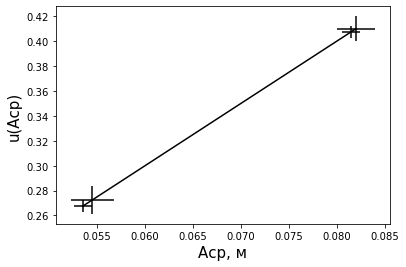

In [6]:
import pandas as pd
data = pd.DataFrame({'A' : A, 'u' : u, 'sig' : sig, 'Su' : Su, 'F' : F})
print(data)

import matplotlib.pyplot as plt
plt.errorbar(A, u, xerr=sig, yerr=Su, color = 'black')
plt.xlabel("Аср, м", fontsize=15)
plt.ylabel("u(Aср)", fontsize=15)
plt.show()

## Основные итоги работы
В ходе работы были найдены коэфициенты силы сухого трения между поверхностью линейки и поверхностями брусков, сделанных из различных материалов, определяя угол z , при котором
происходит переход от движения бруска по бумаге без проскальзывания вдоль линейки рейсшины к движению с проскальзыванием вдоль линейки.
Построен график зависимости $\mu$(Aср), он является линейным, тем самым подтвердается выбранная нами модель $\mu$=tgz.